In [234]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.express as px

In [236]:
df = pd.read_csv("dados/train.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
PassengerId,1,2,3,4,5,6,7,8,9,10
Survived,0,1,1,1,0,0,0,0,1,1
Pclass,3,1,3,1,3,3,1,3,3,2
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)"
Sex,male,female,female,female,male,male,male,male,female,female
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0
SibSp,1,1,0,1,0,0,0,3,0,1
Parch,0,0,0,0,0,0,0,1,2,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
(df.isnull().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [242]:
# Remover colunas específicas do DataFrame
colunas_para_remover = ['Name', 'PassengerId', 'Ticket', 'Cabin']
df = df.drop(columns=colunas_para_remover)

In [244]:
df = df.dropna(subset=['Embarked'])

In [246]:
df["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

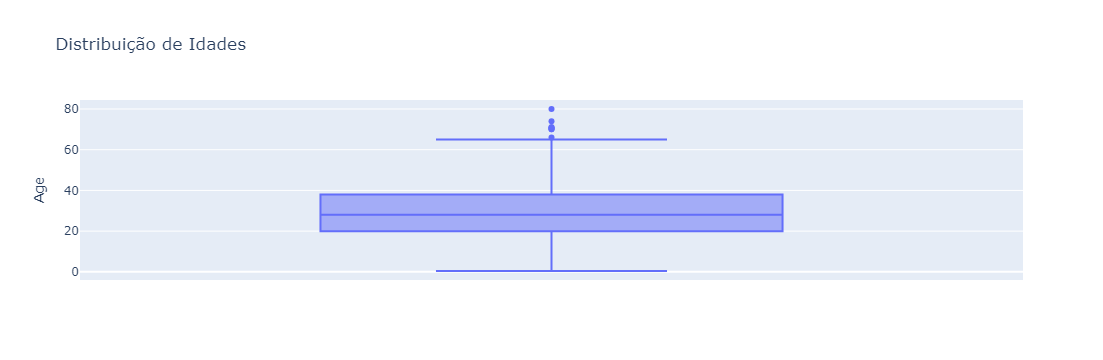

In [248]:
# Criar o boxplot da coluna 'Age'
fig = px.box(df, y='Age', title="Distribuição de Idades")

# Exibir o gráfico
fig.show()

In [250]:
# Substituir os valores nulos de 'Age' pela mediana
mediana_age = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_age)

In [252]:
(df.isnull().sum() / len(df)) * 100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [254]:
# Substituir 'male' por 1 e 'female' por 2 na coluna 'Sex' usando map
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})

In [256]:
# Substituir C = Cherbourg, Q = Queenstown, S = Southampton, por 1, 2 e 3 respectivamente
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [258]:
# Transformando colunas em int
df['Survived'] = df['Survived'].astype(int)
df['Sex'] = df['Sex'].astype(int)
df['Parch'] = df['Parch'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)
df['Embarked'] = df['Embarked'].astype(int)

In [260]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Survived,0.00,1.0000,1.000,1.0,0.00,0.0000,0.0000,0.000,1.0000,1.0000
Pclass,3.00,1.0000,3.000,1.0,3.00,3.0000,1.0000,3.000,3.0000,2.0000
Sex,1.00,2.0000,2.000,2.0,1.00,1.0000,1.0000,1.000,2.0000,2.0000
Age,22.00,38.0000,26.000,35.0,35.00,28.0000,54.0000,2.000,27.0000,14.0000
SibSp,1.00,1.0000,0.000,1.0,0.00,0.0000,0.0000,3.000,0.0000,1.0000
Parch,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,1.000,2.0000,0.0000
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
Embarked,3.00,1.0000,3.000,3.0,3.00,2.0000,3.0000,3.000,3.0000,1.0000


Survived    1.000000
Sex         0.541585
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.069822
Embarked   -0.169718
Pclass     -0.335549
Name: Survived, dtype: float64


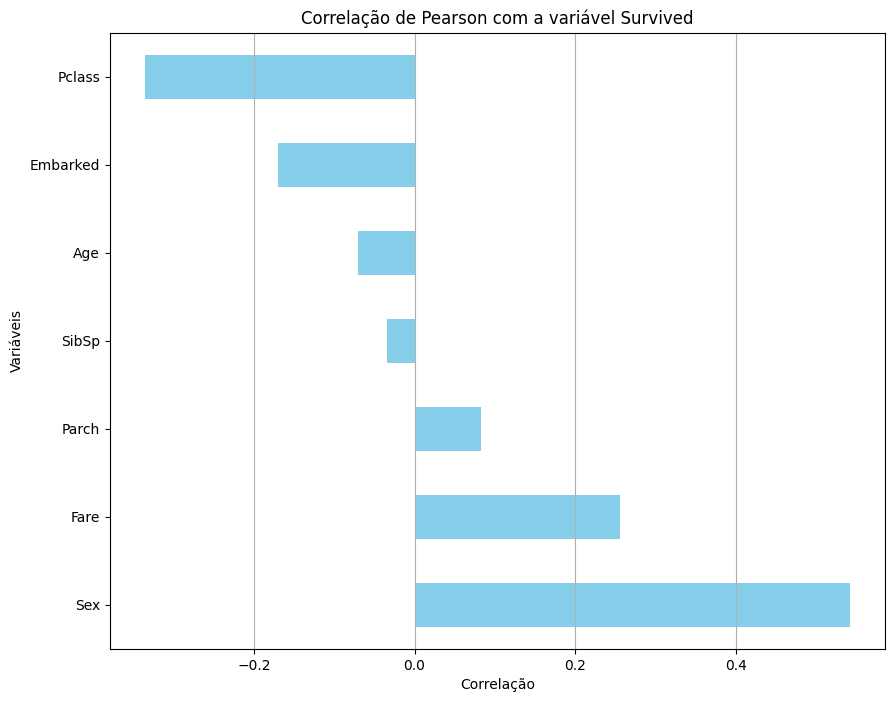

In [262]:
# Inicializar a lista resultados
resultados = []

# Calculando a correlação de Pearson entre as variáveis independentes e a variável alvo
correlacao = df.corr(method='pearson')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo = correlacao['Survived'].sort_values(ascending=False)

# Exibindo as correlações
print(correlacao_vivo)
resultados.append(correlacao_vivo)

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
correlacao_vivo.drop('Survived').plot(kind='barh', color='skyblue')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Pearson com a variável Survived')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

Survived    1.000000
Sex         0.541585
Fare        0.320772
Parch       0.140126
SibSp       0.090944
Age        -0.041027
Embarked   -0.162313
Pclass     -0.336917
Name: Survived, dtype: float64


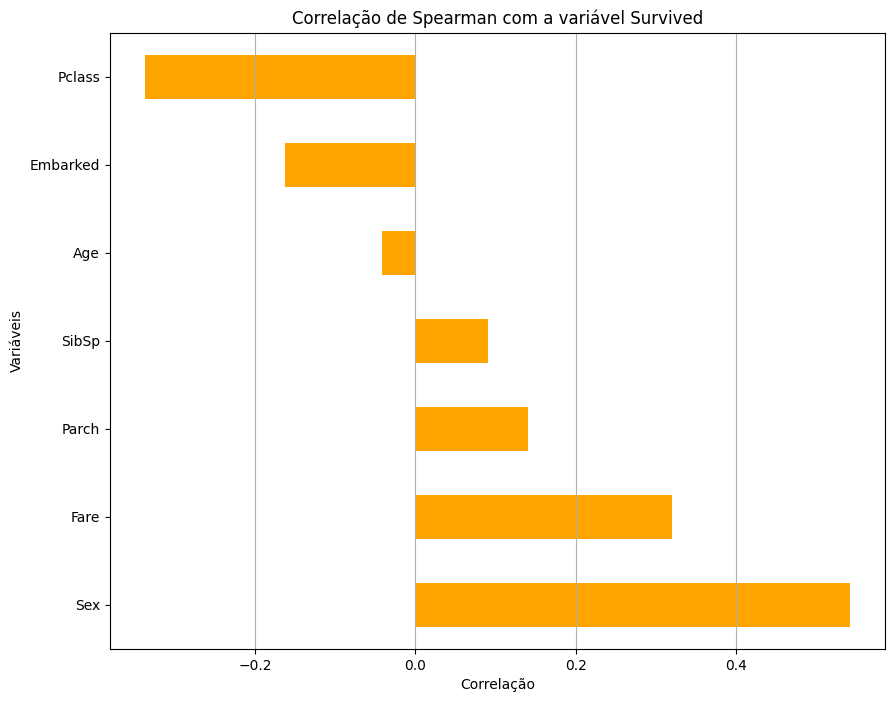

In [264]:
# Inicializar a lista resultados
resultados_spearman = []

# Calculando a correlação de Spearman entre as variáveis independentes e a variável alvo
correlacao_spearman = df.corr(method='spearman')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo_spearman = correlacao_spearman['Survived'].sort_values(ascending=False)

# Exibindo as correlações de Spearman
print(correlacao_vivo_spearman)
resultados_spearman.append(correlacao_vivo_spearman)

# Gerando o gráfico de barras horizontais - Spearman
plt.figure(figsize=(10, 8))
correlacao_vivo_spearman.drop('Survived').plot(kind='barh', color='orange')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Spearman com a variável Survived')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

Survived    1.000000
Sex         0.541585
Fare        0.263799
Parch       0.135726
SibSp       0.087904
Age        -0.034434
Embarked   -0.157795
Pclass     -0.320934
Name: Survived, dtype: float64


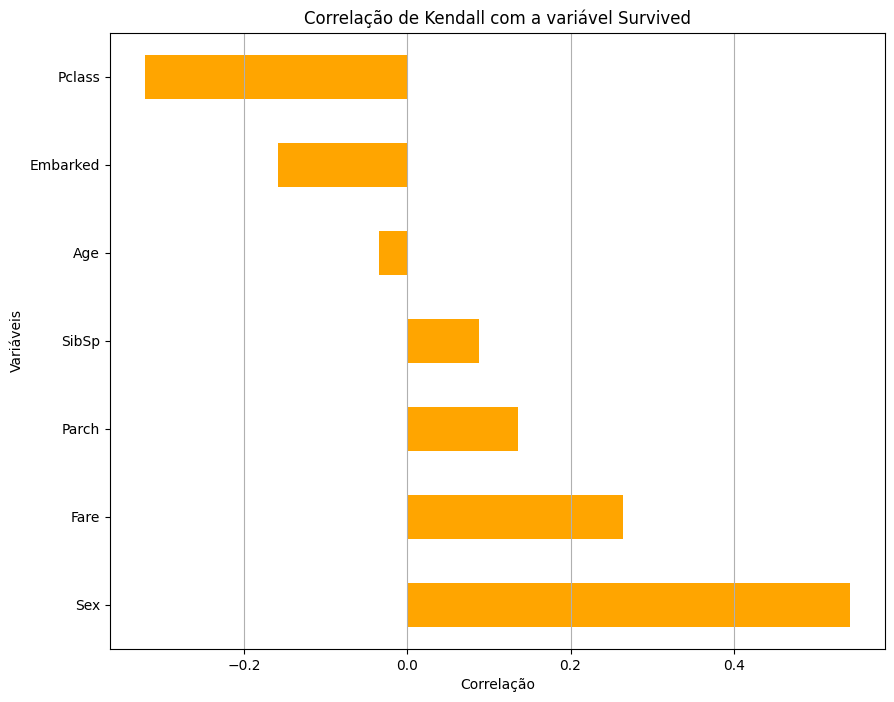

In [266]:
# Inicializar a lista resultados
resultados_kendall = []

# Calculando a correlação de Kendall
correlacao_kendall = df.corr(method='kendall')

# Exibindo a correlação com a variável alvo 'VIVO'
correlacao_vivo_kendall = correlacao_kendall['Survived'].sort_values(ascending=False)

# Exibindo as correlações de Spearman
print(correlacao_vivo_kendall)
resultados_kendall.append(correlacao_vivo_kendall)

# Gerando o gráfico de barras horizontais - Spearman
plt.figure(figsize=(10, 8))
correlacao_vivo_kendall.drop('Survived').plot(kind='barh', color='orange')  # Excluindo 'VIVO' de si mesma
plt.title('Correlação de Kendall com a variável Survived')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x')

# Exibir o gráfico
plt.show()

In [268]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Survived,0.00,1.0000,1.000,1.0,0.00,0.0000,0.0000,0.000,1.0000,1.0000
Pclass,3.00,1.0000,3.000,1.0,3.00,3.0000,1.0000,3.000,3.0000,2.0000
Sex,1.00,2.0000,2.000,2.0,1.00,1.0000,1.0000,1.000,2.0000,2.0000
Age,22.00,38.0000,26.000,35.0,35.00,28.0000,54.0000,2.000,27.0000,14.0000
SibSp,1.00,1.0000,0.000,1.0,0.00,0.0000,0.0000,3.000,0.0000,1.0000
Parch,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,1.000,2.0000,0.0000
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
Embarked,3.00,1.0000,3.000,3.0,3.00,2.0000,3.0000,3.000,3.0000,1.0000


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int32  
 1   Pclass    889 non-null    int32  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int32  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 45.1 KB


In [272]:
# Salvar o DataFrame como um arquivo CSV
df.to_csv('dados/train_f.csv', index=False)  # index=False para não incluir os índices